Необходимо рассмотреть:

SMA (Simple moving average) / MA (Moving average)

SES (Simple exponential smoothing)

AR (Autoregressive)

ARMA (Autoregressive moving average)

ARIMA (Autoregressive integrated moving average)

SARIMA (Seasonal autoregressive integrated moving average)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, \
    median_absolute_error, mean_squared_error, mean_squared_log_error

import warnings
warnings.filterwarnings("ignore")

In [ ]:
ts = pd.read_csv('https://raw.githubusercontent.com/ranalytics/tsa-r/master/data/cryptos_price.csv')
ts=ts.sort_values(by='ds')
ts

,y,ds,coin
7754,4.530000,2018-01-01,tezos
2114,2.390000,2018-01-01,xrp
2819,1.010000,2018-01-01,tether
3524,229.030000,2018-01-01,litecoin
4229,8.840000,2018-01-01,eos
...,...,...,...
4230,0.055028,2019-12-06,stellar
3525,2.740000,2019-12-06,eos
2820,45.670000,2019-12-06,litecoin
2115,1.000000,2019-12-06,tether


In [ ]:
import plotly.express as px
fig = px.line(ts, # ts[ts['coin'] == 'bitcoin']
              x="ds", y="y", color="coin",
              line_shape="spline", #сплайн-аппроксимация
              render_mode="svg", log_y=True)
fig.update_layout(xaxis_title="Дата", yaxis_title="Курс, долл. США")

# fig.layout.xaxis.title = 'Название оси'
# fig.layout.yaxis.title = 'Название другой оси'
# fig.layout.title.text = 'Новое название диаграммы'
fig.show()

In [ ]:
# вот так можно сохранять график в html
fig.write_html('html_plot.html',
    config={'toImageButtonOptions':
    {'format': 'svg'}})

# Скользящее среднее - SMA (Simple moving average) / MA (Moving average)

In [ ]:
bc = ts[ts['coin'] == 'bitcoin']
window=10 # создается окно фильтрации
scale=1.96 #2.58 - 99%

bc["SMA_avg"] = bc["y"].rolling(window=window).mean()
mae = mean_absolute_error(bc["y"][window:].fillna(0), bc["y"][window:].fillna(0))
mae = mean_absolute_error(bc["y"][window:].fillna(0), bc["SMA_avg"][window:].fillna(0))
std = np.std(bc["y"][window:] -  bc["SMA_avg"][window:])
bc["SMA_min"] =  bc["SMA_avg"] - (mae + scale * std)
bc["SMA_max"] =  bc["SMA_avg"]+ (mae + scale * std)

bc

,y,ds,coin,SMA_avg,SMA_min,SMA_max
704,13657.20,2018-01-01,bitcoin,NaN,NaN,NaN
703,14982.10,2018-01-02,bitcoin,NaN,NaN,NaN
702,15201.00,2018-01-03,bitcoin,NaN,NaN,NaN
701,15599.20,2018-01-04,bitcoin,NaN,NaN,NaN
700,17429.50,2018-01-05,bitcoin,NaN,NaN,NaN
...,...,...,...,...,...,...
4,7321.99,2019-12-02,bitcoin,7388.214,5857.075204,8919.352796
3,7320.15,2019-12-03,bitcoin,7380.449,5849.310204,8911.587796
2,7252.03,2019-12-04,bitcoin,7400.860,5869.721204,8931.998796
1,7448.31,2019-12-05,bitcoin,7431.078,5899.939204,8962.216796


In [ ]:
bc['coin'].unique()[0]

'bitcoin'

In [ ]:
fig = px.line(bc,
              x="ds", y=bc.columns[-3:],
              # line_shape="spline",
              render_mode="svg", log_y=False)

fig.add_scatter(x=bc["ds"],  y=bc["y"],mode='lines', )

fig.show()

In [ ]:
bc['anomaly_min'] = bc[bc['y']<bc["SMA_min"]]['y']
bc['anomaly_max'] = bc[bc['y']>bc["SMA_max"]]['y']

In [ ]:
bc

,y,ds,coin,SMA_avg,SMA_min,SMA_max,anomaly_min,anomaly_max
704,13657.20,2018-01-01,bitcoin,NaN,NaN,NaN,NaN,NaN
703,14982.10,2018-01-02,bitcoin,NaN,NaN,NaN,NaN,NaN
702,15201.00,2018-01-03,bitcoin,NaN,NaN,NaN,NaN,NaN
701,15599.20,2018-01-04,bitcoin,NaN,NaN,NaN,NaN,NaN
700,17429.50,2018-01-05,bitcoin,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4,7321.99,2019-12-02,bitcoin,7388.214,5857.075204,8919.352796,NaN,NaN
3,7320.15,2019-12-03,bitcoin,7380.449,5849.310204,8911.587796,NaN,NaN
2,7252.03,2019-12-04,bitcoin,7400.860,5869.721204,8931.998796,NaN,NaN
1,7448.31,2019-12-05,bitcoin,7431.078,5899.939204,8962.216796,NaN,NaN


In [ ]:
fig = px.line(bc,
              x="ds", y=bc.columns[-5:-2],
              # line_shape="spline",
              render_mode="svg", log_y=False)

fig.add_scatter(x=bc["ds"],  y=bc["y"],mode='lines', name='time series')
fig.add_scatter(x=bc["ds"],  y=bc["anomaly_max"],mode='markers', name='anomaly_max')
fig.add_scatter(x=bc["ds"],  y=bc["anomaly_min"],mode='markers', name='anomaly_min')
fig.show()

А что с прогнозом????

К сожалению, такой прогноз долгосрочным сделать не удастся — для получения предсказания на шаг вперед предыдущее значение должно быть фактически наблюдаемой величиной. Зато у скользящей средней есть другое применение — сглаживание исходного ряда для выявления трендов. В пандасе есть готовая реализация — DataFrame.rolling(window).mean()

In [ ]:
bc['y'].rolling(window=10).mean()

,y
704,NaN
703,NaN
702,NaN
701,NaN
700,NaN
...,...
4,7388.214
3,7380.449
2,7400.860
1,7431.078


# Экспоненциальное сглаживание

In [ ]:
alpha =   0.1
result = [bc["y"][0]] # first value is same as series
for n in range(1,len(bc["y"])):
  result.append(alpha * bc["y"][n] + (1 - alpha) * result[n-1])
result.reverse()
bc['exp'] = result


In [ ]:
fig = px.line(bc,
              x="ds", y=bc.columns[0],
              # line_shape="spline",
              render_mode="svg", log_y=False,)

fig.add_scatter(x=bc["ds"],  y=bc["exp"], mode='lines', name='экспоненциальное сглаживание')

fig.show()

# Двойное экспоненциальное сглаживание
(метод Хольта)

In [ ]:
alpha = 0.05
beta = 0.01
result = [bc["y"][0]] # first value is same as series]
for n in range(1,len(bc["y"])):
  if n == 1:
    level, trend = bc["y"][0], bc["y"][1] - bc["y"][0]
    # forecasting
  if n >= len(bc["y"]):
    value = result[-1]
  else:
    value = bc["y"][n]
  last_level = level
  level = alpha*value + (1-alpha)*(level+trend)
  trend = beta*(level-last_level) + (1-beta)*trend
  result.append(level+trend)
result.reverse()
bc['exp_2'] = result

In [ ]:
fig = px.line(bc,
              x="ds", y=bc.columns[0],
              # line_shape="spline",
              render_mode="svg", log_y=False,)

fig.add_scatter(x=bc["ds"],  y=bc["exp"], mode='lines', name='экспоненциальное сглаживание')
fig.add_scatter(x=bc["ds"],  y=bc["exp_2"],mode='lines', name='двойное экспоненциальное сглаживание')

fig.show()

# Autoregressive (AR)

#### Экспресс-введение в ARIMA-семейство

Cовсем вкратце о самой модели. Начнём по буквам составлять это длинное название $SARIMA(p, d, q)(P, D, Q, s)$, Seasonal Autoregression Moving Average model:

- $AR(p)$ - модель авторегрессии, т.е. регрессии временного ряда на самого себя, в основе лежит предположение о том, что временной ряд зависит от своих предыдущих значений с некоторым лагом (или с несколькими лагами), максимальный лаг, который входит в модель, обозначается буквой $p$. Определить начальное значение $p$ можно при помощи графика PACF по значимому лагу, после которого большинство оставшихся лагов становятся не значимыми.
- $MA(q)$ - модель скользящего среднего, если не вдаваться в детали - моделирует случайные ошибки временного ряда, т.е., как текущая ошибка во временном ряду зависит от предыдущих с некоторым лагом, здесь лаг обозначается буквой $q$. Начальное значение можно определить по графику ACF, логика аналогична.

Немножко остановимся и объединим первые четыре буквы, чтобы посмотреть, что у нас получилось:

$AR(p) + MA(q) = ARMA(p, q)$

А у нас получилась модель авторегрессии - скользящего среднего, если временной ряд стационарен, его можно смело аппроксимировать этими четырьмя буквами. Продолжим-с

- $I(d)$ - порядок интегрированности временного ряда. За этими словами стоит очень простая штука - сколько нам обычных разностей в ряде пришлось взять, чтобы привести его к стационарному, такой порядок интегрированности и будет. В нашем случае это единичка, так как мы взяли от нашего ряда первую разность.

Добавим к нашим четырём буквам и получим модель $ARIMA$, которая умеет работать с нестационарными временными рядами, которые можно привести к стационарным при помощи взятия разностей некоторого порядка. Отлично, осталась последняя буква!

- $S(s)$ - эта буква отвечает за сезонность и равна длине периода сезонности во временном ряде

Прикрепляем последнюю букву и оказывается, что вместо одного дополнительного параметра у нас добавилось сразу три - $(P, D, Q)$

- $P$ - порядок модели авторегрессии для сезонной компоненты, также определяется по PACF, только смотреть нужно на число значимых лагов, кратных периоду сезонности, например, если период равен 24 и выясняется, что по PACF значим 24-й и 48-й лаг, то для начального приближения можно взять $P = 2$

- $Q$ - аналогично, но для модели скользящего среднего по сезонной компоненте, определяется по ACF

- $D$ - порядок сезонной интегрированности временного ряда. Может быть равен либо 0, либо 1, так как сезонное дифференцирование либо проводилось, либо нет

In [ ]:
# возьмем только нужное
bc = bc[['ds','y']]

In [ ]:
bc

,ds,y
704,2018-01-01,13657.20
703,2018-01-02,14982.10
702,2018-01-03,15201.00
701,2018-01-04,15599.20
700,2018-01-05,17429.50
...,...,...
4,2019-12-02,7321.99
3,2019-12-03,7320.15
2,2019-12-04,7252.03
1,2019-12-05,7448.31


In [ ]:
# Добавим фичей в датафрейм
for i in range(1, 10):  # Создадим временной лаг на N дней
    bc[f'Lag_{i}'] = bc['y'].shift(i)

# удалим строки с NaN
bc.dropna(inplace=True)

# Разобьем данные на тестовую и обучающую выборку сохраняя порядок
train_size = int(0.75 * len(bc))
train_data = bc[:train_size]
test_data = bc[train_size:]

# Define the input features (lag features) and target variable
y_train = train_data['y']
y_test = test_data['y']

In [ ]:
bc

,ds,y,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9
695,2018-01-10,14973.30,14595.40,15170.10,16477.60,17527.00,17429.50,15599.20,15201.00,14982.10,13657.20
694,2018-01-11,13405.80,14973.30,14595.40,15170.10,16477.60,17527.00,17429.50,15599.20,15201.00,14982.10
693,2018-01-12,13980.60,13405.80,14973.30,14595.40,15170.10,16477.60,17527.00,17429.50,15599.20,15201.00
692,2018-01-13,14360.20,13980.60,13405.80,14973.30,14595.40,15170.10,16477.60,17527.00,17429.50,15599.20
691,2018-01-14,13772.00,14360.20,13980.60,13405.80,14973.30,14595.40,15170.10,16477.60,17527.00,17429.50
...,...,...,...,...,...,...,...,...,...,...,...
4,2019-12-02,7321.99,7424.29,7569.63,7761.24,7463.11,7531.66,7218.37,7146.13,7047.92,7397.80
3,2019-12-03,7320.15,7321.99,7424.29,7569.63,7761.24,7463.11,7531.66,7218.37,7146.13,7047.92
2,2019-12-04,7252.03,7320.15,7321.99,7424.29,7569.63,7761.24,7463.11,7531.66,7218.37,7146.13
1,2019-12-05,7448.31,7252.03,7320.15,7321.99,7424.29,7569.63,7761.24,7463.11,7531.66,7218.37


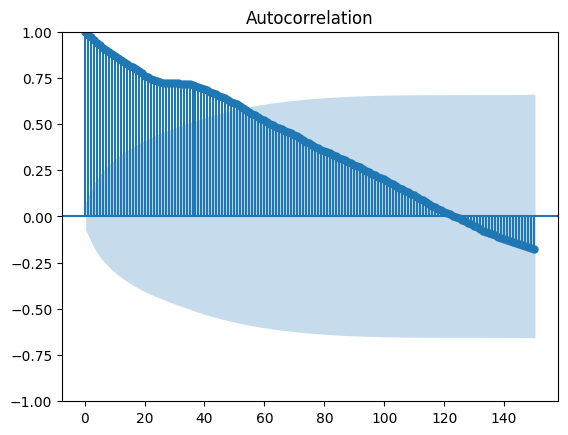

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(bc['y'], lags=150)
plt.show()

Автокорреляционная функция монотонно убывает: ряд имеет тренд

In [ ]:
bc['y'].corr(bc['y'].shift(1))

0.9901313301216627

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Создадим и обучим авторегрессионную модель
lag_order = [1, 20, 40, 120] # Зададим анализ сдвигов на основе АКФ


ar_model = AutoReg(y_train, lags=lag_order
                   )
ar_results = ar_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



In [ ]:
ar_results.params

,0
const,97.364349
y.L1,0.998749
y.L20,-0.007604
y.L40,0.004125
y.L120,-0.010215


In [ ]:
# Make predictions on the test set
y_pred = ar_results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)
#print(y_pred)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Mean Absolute Error: {mae:.2f}');
print(f'Root Mean Squared Error: {rmse:.2f}');

Mean Absolute Error: 1094.45
Root Mean Squared Error: 1350.13


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [ ]:
fig = px.line(bc,
              x=test_data["ds"], y=y_test,
              # line_shape="spline",
              render_mode="svg", log_y=False,)
fig.add_scatter(x=test_data["ds"],  y=y_pred,mode='lines', name='AR')
fig.show()

In [ ]:
y_pred_30 = ar_results.predict(start=len(train_data) + len(test_data) + 1, end=len(train_data) + len(test_data) + 31, dynamic=False)

fig = px.line(bc,
              x=test_data["ds"], y=y_test,
              # line_shape="spline",
              render_mode="svg", log_y=False,)
fig.add_scatter(x=test_data["ds"],  y=y_pred,mode='lines', name='AR')
fig.add_scatter(x=pd.date_range(test_data["ds"].loc[0], periods=30, freq="D"),  y=y_pred_30,mode='lines', name='AR_+30')
fig.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



# ARMA (Autoregressive moving average)

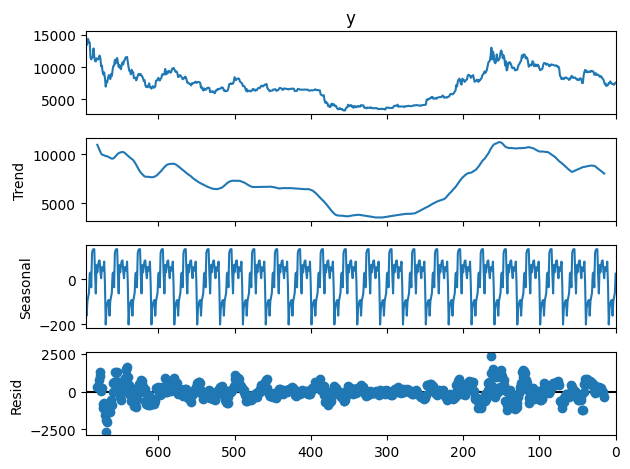

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(x=bc['y'], model='additive', period = 30).plot()

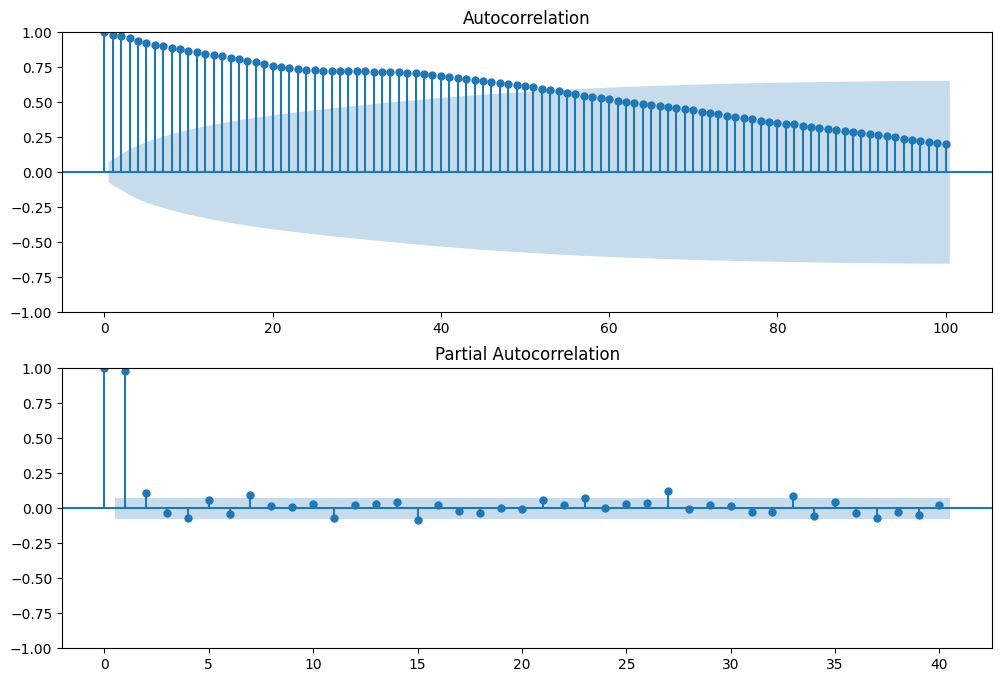

In [ ]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(bc['y'].values.squeeze(), lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(bc['y'], lags=40, ax=ax2)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
arma_mod20 = ARIMA(y_train, order=(2, 0, 0)).fit()
print(arma_mod20.params)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



const      6646.668588
ar.L1         0.967428
ar.L2         0.029975
sigma2    98936.587748
dtype: float64


In [ ]:
print(arma_mod20.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  522
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -3745.378
Date:                Wed, 25 Sep 2024   AIC                           7498.756
Time:                        18:30:45   BIC                           7515.786
Sample:                             0   HQIC                          7505.426
                                - 522                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6646.6686   6782.878      0.980      0.327   -6647.527    1.99e+04
ar.L1          0.9674      0.028     34.180      0.000       0.912       1.023
ar.L2          0.0300      0.029      1.048      0.2

In [ ]:
arma_mod30 = ARIMA(y_train, order=(3, 0, 0)).fit()
print(arma_mod30.params)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



const      6646.663550
ar.L1         0.968116
ar.L2         0.076639
ar.L3        -0.047571
sigma2    98726.208843
dtype: float64


In [ ]:
print(arma_mod30.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  522
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -3744.822
Date:                Wed, 25 Sep 2024   AIC                           7499.644
Time:                        18:30:49   BIC                           7520.933
Sample:                             0   HQIC                          7507.982
                                - 522                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6646.6636   6340.761      1.048      0.295   -5781.000    1.91e+04
ar.L1          0.9681      0.028     34.552      0.000       0.913       1.023
ar.L2          0.0766      0.039      1.969      0.0

In [ ]:
sm.stats.durbin_watson(arma_mod30.resid.values)

1.6406739039391982

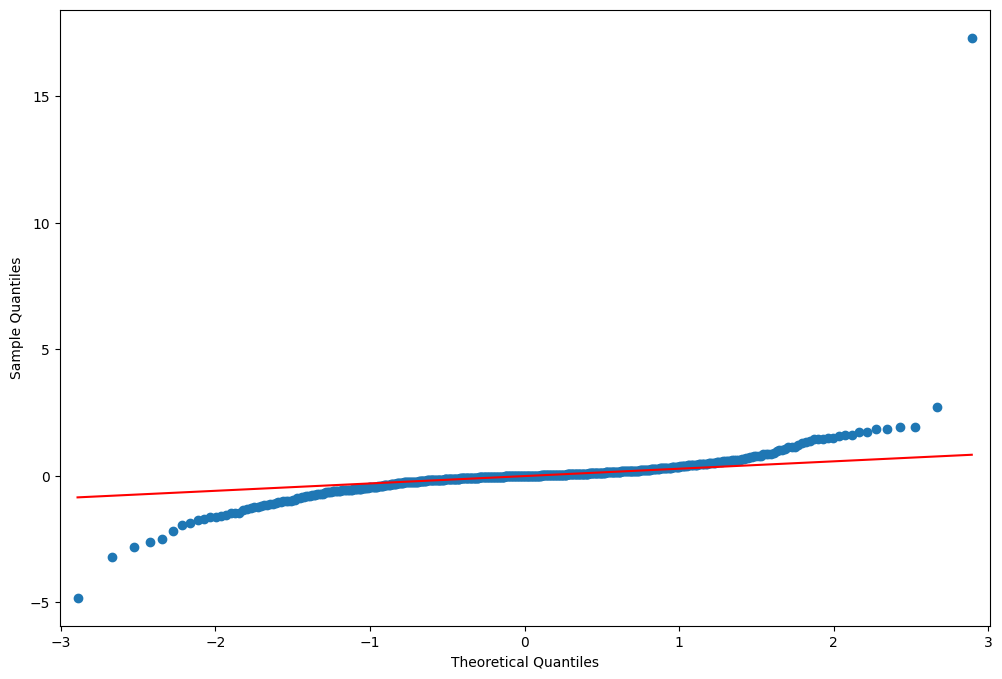

In [ ]:
from statsmodels.graphics.api import qqplot
resid = arma_mod20.resid
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line="q", ax=ax, fit=True)

QQ Plot расшифровывается как Quantile vs Quantile Plot и представляет собой построение теоретических квантилей против фактических квантилей нашей переменной.
График QQ позволяет нам увидеть отклонение от нормального распределения намного лучше, чем на гистограмме.

In [ ]:
# Make predictions on the test set
y_pred_mod20 = arma_mod20.predict(start=len(train_data), end=len(train_data) + len(test_data)-1, dynamic=False)
#print(y_pred)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred_mod20 )
rmse = np.sqrt(mean_squared_error(y_test, y_pred_mod20 ))
print(f'Mean Absolute Error: {mae:.2f}');
print(f'Root Mean Squared Error: {rmse:.2f}');

Mean Absolute Error: 1362.07
Root Mean Squared Error: 1678.51


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [ ]:
# Make predictions on the test set
y_pred_mod30 = arma_mod30.predict(start=len(train_data), end=len(train_data) + len(test_data)-1, dynamic=False)
#print(y_pred)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred_mod30 )
rmse = np.sqrt(mean_squared_error(y_test, y_pred_mod30 ))
print(f'Mean Absolute Error: {mae:.2f}');
print(f'Root Mean Squared Error: {rmse:.2f}');

Mean Absolute Error: 1366.02
Root Mean Squared Error: 1683.84


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [ ]:
fig = px.line(bc,
              x=test_data["ds"], y=y_test,
              # line_shape="spline",
              render_mode="svg", log_y=False,)

fig.add_scatter(x=test_data["ds"],  y=y_pred_mod20, mode='lines', name='Predicted')
fig.add_scatter(x=test_data["ds"],  y=y_pred_mod30, mode='lines', name='Predicted')

fig.show()

In [ ]:
y_pred_arma_mod20_30 = arma_mod20.predict(start=len(train_data) + len(test_data) + 1, end=len(train_data) + len(test_data) + 31, dynamic=False)
y_pred_arma_mod30_30 = arma_mod30.predict(start=len(train_data) + len(test_data) + 1, end=len(train_data) + len(test_data) + 31, dynamic=False)

fig = px.line(bc,
              x=test_data["ds"], y=y_test,
              # line_shape="spline",
              render_mode="svg", log_y=False,)
fig.add_scatter(x=test_data["ds"],  y=y_pred_mod20, mode='lines', name='ARMA_20')
fig.add_scatter(x=test_data["ds"],  y=y_pred_mod30, mode='lines', name='ARMA_30')

fig.add_scatter(x=pd.date_range(test_data["ds"].loc[0], periods=30, freq="D"),  y=y_pred_arma_mod20_30,mode='lines', name='ARMA_20+30')
fig.add_scatter(x=pd.date_range(test_data["ds"].loc[0], periods=30, freq="D"),  y=y_pred_arma_mod30_30,mode='lines', name='ARMA_30+30')
fig.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



# ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
arima = ARIMA(y_train, order=(2, 0, 2)).fit() # при order=(2, 0, 0) ARIMA превращается в ARMA 20
print(arima.params)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



const      6646.645932
ar.L1         0.096942
ar.L2         0.898382
ma.L1         0.873679
ma.L2        -0.028484
sigma2    98937.833662
dtype: float64


In [ ]:
print(arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  522
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -3745.374
Date:                Wed, 25 Sep 2024   AIC                           7502.749
Time:                        18:31:00   BIC                           7528.295
Sample:                             0   HQIC                          7512.754
                                - 522                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6646.6459   6919.869      0.961      0.337   -6916.048    2.02e+04
ar.L1          0.0969      0.803      0.121      0.904      -1.478       1.671
ar.L2          0.8984      0.802      1.121      0.2

In [ ]:
# Make predictions on the test set
y_pred_arima= arima.predict(start=len(train_data), end=len(train_data) + len(test_data)-1, dynamic=False)
#print(y_pred)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred_arima )
rmse = np.sqrt(mean_squared_error(y_test, y_pred_arima ))
print(f'Mean Absolute Error: {mae:.2f}');
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Absolute Error: 1360.18
Root Mean Squared Error: 1676.05


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [ ]:
fig = px.line(bc,
              x=test_data["ds"], y=y_test,
              # line_shape="spline",
              render_mode="svg", log_y=False,)

fig.add_scatter(x=test_data["ds"],  y=y_pred_arima, mode='lines', name='ARIMA')

fig.show()

In [ ]:
y_pred_arima_30 = arima.predict(start=len(train_data) + len(test_data) - 1, end=len(train_data) + len(test_data) + 30, dynamic=False)


fig = px.line(bc,
              x=test_data["ds"], y=y_test,
              # line_shape="spline",
              render_mode="svg", log_y=False,)
fig.add_scatter(x=test_data["ds"],  y=y_pred_arima, mode='lines', name='ARIMA')

fig.add_scatter(x=pd.date_range(test_data["ds"].loc[0], periods=30, freq="D"),  y=y_pred_arima_30,mode='lines', name='ARIMA+30')
fig.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



# SARIMAX

SARIMA: Autoregressive + Moving Average + Trend Differencing + Seasonal Differencing

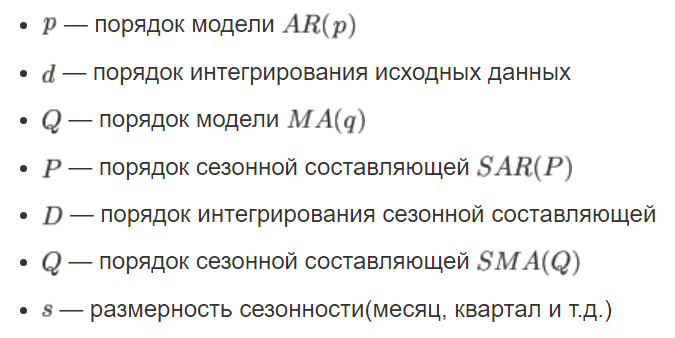

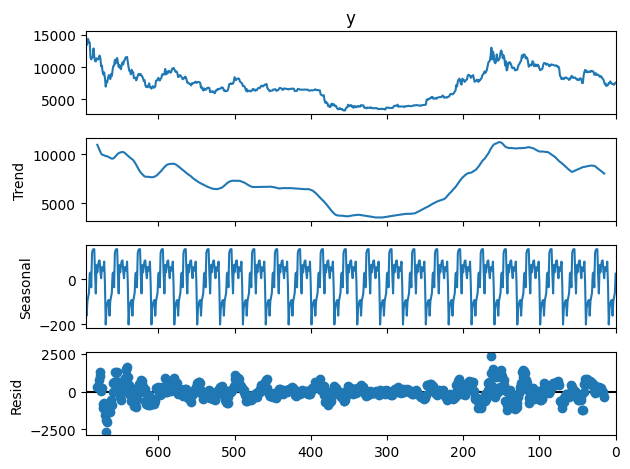

In [ ]:
decomposition

In [ ]:
# еще вариант отдельно использовать SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
sarima = ARIMA(y_train, order=(2, 0, 2), seasonal_order=(0, 0, 1, 20)).fit()

print(sarima.params)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



const        6646.645330
ar.L1           0.132211
ar.L2           0.862410
ma.L1           0.831272
ma.L2          -0.031325
ma.S.L20        0.128939
sigma2      97770.363177
dtype: float64


In [ ]:
print(arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  522
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -3745.374
Date:                Wed, 25 Sep 2024   AIC                           7502.749
Time:                        18:31:23   BIC                           7528.295
Sample:                             0   HQIC                          7512.754
                                - 522                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6646.6459   6919.869      0.961      0.337   -6916.048    2.02e+04
ar.L1          0.0969      0.803      0.121      0.904      -1.478       1.671
ar.L2          0.8984      0.802      1.121      0.2

In [ ]:
# Make predictions on the test set
y_pred_sarima= sarima.predict(start=len(train_data), end=len(train_data) + len(test_data)-1, dynamic=False)
#print(y_pred)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred_sarima )
rmse = np.sqrt(mean_squared_error(y_test, y_pred_sarima ))
print(f'Mean Absolute Error: {mae:.2f}');
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Absolute Error: 1396.67
Root Mean Squared Error: 1722.35


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [ ]:
fig = px.line(bc,
              x=test_data["ds"], y=y_test,
              # line_shape="spline",
              render_mode="svg", log_y=False,)

fig.add_scatter(x=test_data["ds"],  y=y_pred_sarima, mode='lines', name='SARIMA')

fig.show()

In [ ]:
def optimizeSARIMA(data, parameters_list, d, D, s):
    """
    Return dataframe with parameters and corresponding AIC
    :param parameters_list:  list with (p, q, P, Q) tuples
    :type parameters_list:    list
    :param d:                integration order in ARIMA model
    :type d:                  int
    :param D:                seasonal integration order
    :type D:                  int
    :param s:                length of season
    :type s:                  int
    """
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model = sm.tsa.statespace.SARIMAX(data,
                order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue

        aic = model.aic
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']

    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)

    return result_table

In [ ]:
%time
from tqdm import tqdm_notebook
from itertools import product
ps = range(2, 3)
d = 1
qs = range(2, 3)
Ps = range(0, 3)
D = 1
Qs = range(0, 3)
s = 12

# creating list with all the possible combinations of parameters
parameters_list = list(product(ps, qs, Ps, Qs))

result_table = optimizeSARIMA(y_train, parameters_list, d, D, s)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


  0%|          | 0/9 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: Value

In [ ]:
result_table.head()

,parameters,aic
0,"(2, 2, 0, 2)",7319.168171
1,"(2, 2, 1, 1)",7323.823465
2,"(2, 2, 0, 1)",7325.422426
3,"(2, 2, 1, 2)",7338.543929
4,"(2, 2, 2, 2)",7342.692107


In [ ]:
sarima_opt = sm.tsa.statespace.SARIMAX(y_train, order=(2, d, 2), seasonal_order=(0, D, 2, s)).fit()
print(sarima_opt.params)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ar.L1           0.072696
ar.L2          -0.886592
ma.L1          -0.076731
ma.L2           0.982502
ma.S.L12       -0.931485
ma.S.L24       -0.046584
sigma2      92918.488242
dtype: float64


In [ ]:
# Make predictions on the test set
y_pred_sarima= sarima_opt.predict(start=len(train_data), end=len(train_data) + len(test_data)-1, dynamic=False)
#print(y_pred)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred_sarima )
rmse = np.sqrt(mean_squared_error(y_test, y_pred_sarima ))
print(f'Mean Absolute Error: {mae:.2f}');
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Absolute Error: 1426.55
Root Mean Squared Error: 1745.14


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [ ]:
fig = px.line(bc,
              x=test_data["ds"], y=y_test,
              # line_shape="spline",
              render_mode="svg", log_y=False,)

fig.add_scatter(x=test_data["ds"],  y=y_pred_sarima, mode='lines', name='SARIMA')

fig.show()

In [ ]:
y_pred_sarima_30 = sarima_opt.predict(start=len(train_data) + len(test_data) - 1, end=len(train_data) + len(test_data) + 30, dynamic=False,)


fig = px.line(bc,
              x=test_data["ds"], y=y_test,
              # line_shape="spline",
              render_mode="svg", log_y=False,)
fig.add_scatter(x=test_data["ds"],  y=y_pred_sarima, mode='lines', name='SARIMA')

fig.add_scatter(x=pd.date_range(test_data["ds"].loc[0], periods=30, freq="D"),  y=y_pred_sarima_30, mode='lines', name='SARIMA+30')
fig.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



https://www.statsmodels.org/stable/examples/notebooks/generated/tsa_arma_0.html#

https://www.visual-design.net/post/time-series-analysis-arma-arima-sarima

https://education.yandex.ru/handbook/ml/article/vremennye-ryady

https://habr.com/ru/articles/210530/